In [7]:
# PESO ESPECÍFICO (Unidades de g/cm3)
# barras de base 1 cm2 y largo 'l'
# R peso específico -> hay que estimar
# se pesan las barras con una balanza con errores (pequeños pero desconocidos)
# barra largo 'm' -> volumen m cm3 y peso = R*m
# Peso = R * m, Peso se mide con errores, m se concoe

import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [8]:
def coef_corr(x, y):
    '''Dados, dos np.arrays 'x' e 'y', calcula el coeficiente de correlación
    para un ajuste lineal calculado por mínimos cuadrados. Es el coeficiente de
    correlación de Pearson, que indica que tan buena es la relación lineal entre
    dos variables, siendo 1 ó -1 correlación perfecta y 0 nula correlación'''
    arriba = sum(((x - x.mean())*(y-y.mean()))) 
    abajo = sum(((x-x.mean())**2)) * sum(((y -y.mean())**2))
    corr = arriba / np.sqrt(abajo)
    
    return corr
  

In [9]:
enlace = 'https://raw.githubusercontent.com/python-unsam/Programacion_en_Python_UNSAM/master/Notas/11_Recursion/longitudes_y_pesos.csv'
r = requests.get(enlace).content
data_lyp = pd.read_csv(io.StringIO(r.decode('utf-8')))
data_lyp.columns = ['longitud', 'peso']  # pd.dataframe


In [10]:
data_lyp


,longitud,peso
0,19.1,136.92
1,18.3,132.22
2,3.1,20.27
3,10.1,71.70
4,10.8,77.26
...,...,...
95,6.0,44.29
96,19.1,138.61
97,11.9,85.28
98,16.8,120.72


In [11]:
peso = data_lyp['peso']  # pd.serie
longitud = data_lyp['longitud'] # pd.serie

lyp = linear_model.LinearRegression(fit_intercept = False)   # no hay ordenada al origen
# poniendo doble corchete se vuelve a 'ver' como pd.DataFrame
lyp.fit(data_lyp[['longitud']], data_lyp['peso'])
R = float(lyp.coef_ ) # R = 7.202372690217998
R

7.202372690217998

In [13]:
errores = peso - (lyp.predict(data_lyp[['longitud']]))
ecm = (errores**2).mean()  # ecm = 0.9291181822605168
ecm

0.9291181822605168

In [15]:
r2=coef_corr(longitud, peso)
r2

0.9997948247765532

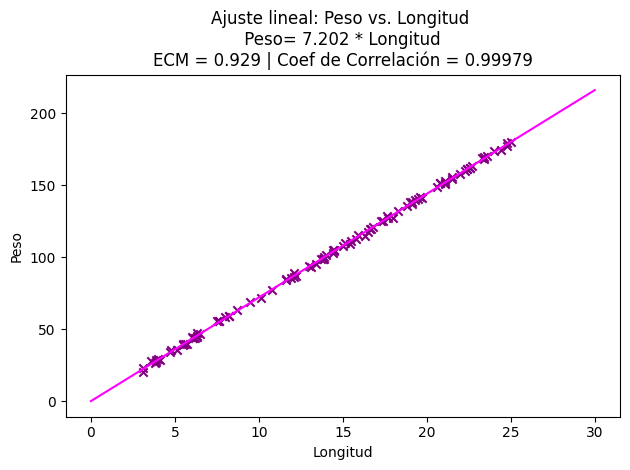

In [16]:
minlong = 0.    # límite inf para ver el ajuste
maxlong = 30.   # lím superior
grilla_longitud = np.linspace(start = minlong, stop = maxlong, num = 1000)
grilla_peso = grilla_longitud * R   # recta de ajuste x mínimos cuadrados
    
fig = plt.scatter(longitud, peso, c ='purple', marker = 'x') # x violetas
  # acomoda los elementos del gráfico
# Agrego la ecuación de la recta fiteada al título, valores redondeados con  
# 3 decim como cifra significativa
plt.title(f'Ajuste lineal: Peso vs. Longitud \n '
          f'Peso= {round(R, 3)} * Longitud \n'
          f'ECM = {round(ecm, 3)} | Coef de Correlación = '
          f'{round(coef_corr(longitud, peso), 5)}')
plt.plot(grilla_longitud, grilla_peso, c = 'magenta') # magenta p/ recta fitted
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.tight_layout() 
plt.show()
